In [1]:
import random
import string
import time
import matplotlib.pyplot as plt

use the "string" module to get a list of characters in the alphabet

In [2]:
string.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

Generate a string of this size:

In [3]:
N=10

In [4]:
26**N

141167095653376

to generate the 10 character random string, we could write a loop:

In [5]:
start=time.time()
this_str=[]
for digit_indx in range(N):
    a_char=random.choice(string.ascii_uppercase) 
    this_str.append(a_char)
    
print(''.join(this_str))
print(time.time()-start,'seconds')

NMYHUERJUU
0.0009398460388183594 seconds


a much shorter way to write the same loop is

In [6]:
my_str=''.join(random.choice(string.ascii_uppercase) 
                  for _ in range(N))
my_str

'OWKRZPBKEW'

Find a "pattern" in random data:

In [7]:
def one_match(str_to_match,ct,prt_bool):
    """
    inputs: 
       * a string to find within a randomly generated string
       * the number of tests to run
       * a boolean to either print or not print output
    outputs:
       * the number of times the input string appears in a random string
    """
    # count the number of matches for the input and the random strings
    number_of_results=0
    for test_indx in range(ct): # ct = number of test to run
        # generate a random string
        my_str=''.join(random.choice(string.ascii_uppercase) for _ in range(N))
        # test to determine whether the input string is in the random string
        if (str_to_match in my_str):
            # if a match is found, increment the success counter
            number_of_results+=1
            if prt_bool:
                print(my_str)
    if prt_bool:
        print('number of results:',number_of_results)
    return(number_of_results)

The probability of getting "A" in the first position of the 10 character string is 1/26.
The probability of getting "A" in the second position of the 10 character string is 1/26.
The probability of getting "A" in the third position of the 10 character string is 1/26.
Therfore, the chance of getting "AAA" in the first three character is 

In [17]:
(1/26)*(1/26)*(1/26)

5.689576695493856e-05

I don't care where "AAA" shows up in the 10 character string, so the outcome for any of the 3 adjacent letters is

In [21]:
(
# AAA_______
((1/26)**3)+
# _AAA______
((1/26)**3)+
# __AAA_____
((1/26)**3)+
# ___AAA____
((1/26)**3)+
# ____AAA___
((1/26)**3)+
# _____AAA__
((1/26)**3)+
# ______AAA_
((1/26)**3)+
# _______AAA
((1/26)**3)
)

0.00045516613563950854

In [8]:
number_of_tests_to_run=10000

If we run 10,000 tests, what's the average number of matches?

In [22]:
number_of_tests_to_run*0.00045516613563950854

4.551661356395085

In [16]:
one_match('AAA',number_of_tests_to_run,True)

TGBSLDAAAZ
HPRGFAAAFV
QPAAAADCFQ
TPWIVAAAAC
UHJAAAJFFN
number of results: 5


5

The more "patterns" we look for, the more successes we will find. 

This is the problem addressed by the Bonferroni's principle.

Solution: normalize your "successes" count by the number of patterns you're looking for

In [9]:
def two_matches(ct,prt_bool):
    number_of_results=0
    for test_indx in range(ct):
        my_str=''.join(random.choice(string.ascii_uppercase) for _ in range(N))
        if ('AAA' in my_str) or ('BBB' in my_str):
            number_of_results+=1
            if prt_bool:
                print(my_str)
    if prt_bool:
        print('number of results:',number_of_results)
    return(number_of_results)

In [10]:
rst_ct=two_matches(number_of_tests_to_run,True)

RMXSPBBBSU
EQLZBBBXAW
AAAJTZVWHB
MOBBBWJNOB
UYZOKKAAAJ
LLDTXITAAA
LMUMZBBBEM
GDAITHIBBB
AAAYSARIBG
BBBTGFMRKB
number of results: 10


Caveat: the following takes a long time (about 2 minutes) to run

In [11]:
start=time.time()
list_of_results=[]
for indx in range(1000):
    rst_ct=two_matches(number_of_tests_to_run,False)
    list_of_results.append(rst_ct)
print(time.time()-start)

187.7088179588318


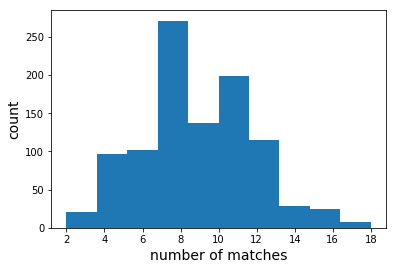

In [12]:
_=plt.hist(list_of_results)
_=plt.xlabel('number of matches',fontsize=14)
_=plt.ylabel('count',fontsize=14)

<BR>
    <BR>
        <BR>
            <BR>
                <BR>
                    <BR>
As we scale up the amount of data we search, we find more successes

In [13]:
two_matches(number_of_tests_to_run*10,True)

IFEVWRBBBJ
HRJAAAZEHJ
NXSBQVBBBS
UAAARKUTXA
BYBBBPMARC
THJRBBBTMK
BBBJBGMPNJ
CBDSCPXBBB
MAAAQCZVZD
NJZXBBBNKR
PYVATAAABG
WHCAAAGGZU
PRJBBBHWVB
UCZQSLCBBB
TLHEUXZBBB
OJAAAZQNUR
IQLEFGKAAA
EUBBBLEAEO
BBBQNAQJGH
BBBMQLFSNP
UQXUIBBBJJ
LZAAAEZUCO
QBCHJBBBMQ
TAAAILALZV
RFJRIWAAAH
AFNWJSIBBB
EBBBVRWZHA
ESALKAAATR
ALOAAAWHUO
PMYAAAMQNP
UZAMAAABVZ
KVIGBBBEGW
AAAIICSZVU
BZNWSBBBIH
WOVOBBBPOD
AAAJTJUQMV
QPTDNECBBB
FXMBNUAAAL
AEBKYVAAAI
BBBNNPDKKZ
ASYNBBBMSE
ZRSTBBBXKW
QAAAOIEGJA
YZFAAARHQL
UNPDUYBBBE
KRRTDXBBBQ
SAFQGUCAAA
JBXZICOAAA
BBBOBDQHZC
QFFYWGBBBG
LGVDFCCBBB
BLXGJWBBBL
BBBFFKHBOE
RBWQAAAXUB
GMGXYBBBUA
KLDAAADPRP
OAZUHZAAAN
MPCHKBBBTW
GSJZHBBBOM
AWBJAAAXKM
YAXZAAASZO
LLNSITBBBF
WELOBBBBPD
ILCBBBJYNO
XBBBDCKOPO
RDOHAAAWVA
BHDVOGAAAH
MBBBHGUGTI
FSEQABAAAM
SUYMBBBONO
WREEXUAAAP
CUZFESBBBS
NNEHBBBXQP
LLIRFXAAAL
JESHJBBBHG
JQRQBBBLWH
RMIANLPAAA
MVQPAAAPJR
AAANNKINQI
VYFVLLMBBB
BBBWOEPFKS
FAIBCZBBBE
WSQOBBBKCW
EBMPZRAAAP
DQOSDUUBBB
SBBBFZMTPE
PABBBYCQQX
PBBBBTQYNO
KAAAZPCAGH
TELDAAAWQX
JMCPAAAXQE

94

As we scale up the data size, we can find increasingly rare patterns

## 'AAA' shows up often; 'AAAA' less often

In [14]:
one_match('AAA',number_of_tests_to_run*10,True)

ZYKICTEAAA
SAAAPESHBC
IDHVAAAFME
AAARPHLERA
XAAAADQCYJ
ZURAAAWEVT
PHAAAZOHLP
FTPNAAANPW
YTIEAAAWFR
BCJIAAAOEX
GIHRAAAVLM
FAAAKSTBNS
AAALISMARO
CESTNZAAAR
AAAANWXFHY
MWDMFQRAAA
GWAAAMHDVH
SHQNAAAWDE
AAAZKQIBYP
GAAAQEXVZD
KEZAIXAAAY
YJKUZHGAAA
PAAAAPEYIL
IOCZYNOAAA
DYLAAARYRN
ZJRFFFOAAA
SOUURAAAUL
DHAAAIIMAY
LUYVAAABWP
IWAAAPGVZG
AWAAAZCIQR
XLCHAAAVKE
MYAAAUPLND
LXIAAARECX
ESLAAAJDPB
AAAFVBJCSF
WAAAOEWBOV
YPLUGAAAKD
HUAAAUDUHD
KSOLBYAAAZ
KHBPDFAAAU
PMWNAJAAAC
WDHHVNAAAN
KECKAAAXJQ
JAAAYCAJOY
AAACNAILNU
FBRHAAAJNB
VMKDAAAHSS
OTMASERAAA
number of results: 49


49

In [15]:
one_match('AAAA',number_of_tests_to_run*10,True)

HAAAAIDMXP
ZAAAANENQI
number of results: 2


2

<BR>
Because doing analysis at scale is costly (in terms of money, time, skills), <BR>
    there's increased incentive to perform test efficiently.
    <BR>
    <BR>
    <BR>
    <BR>
    
Solution: normalize your "successes" by the number of patterns you're looking for